In [2]:
import numpy as np
from scipy.io import loadmat, savemat
import matplotlib
matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import dataholders as dh
import utils

In [3]:
fall = (900, 1100)
flat1 = (3800, 4900)
rise = (5500, 6000)
flat2 = (6000, 6666)
flat3 = (6730, 7400)

In [4]:
path = 'data_flight16.mat'
window = 501
data = dh.TempWindData(path, path, True)

#data.cut_time(*flat1)

data.get_angles(True)
data.get_temp_from_voltage()
data.get_temp_deviations(window)
data.get_angle_deviations(window)

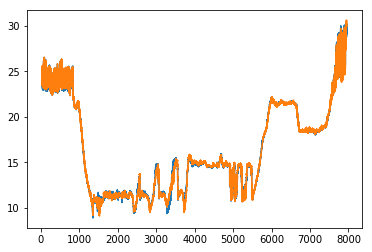

In [5]:
%matplotlib inline
plt.plot(data.time, data.T1)
plt.plot(data.time, data.T2)
#plt.plot(data.time, data.T_base)
plt.show()

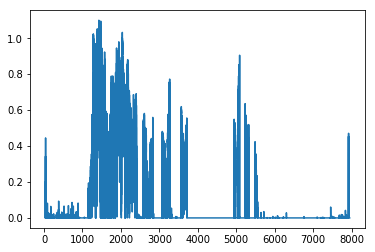

In [6]:
plt.plot(data.time, data.lwc)
plt.show()

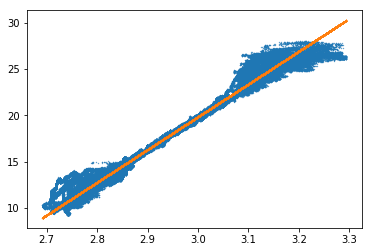

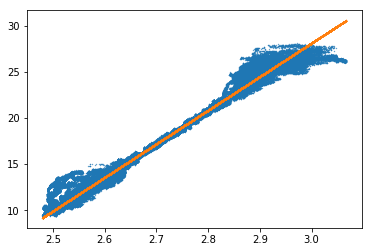

In [7]:
plt.scatter(data.V1, data.T_base, s=.1)
plt.scatter(data.V1, data.T1, s=.1)
plt.show()

plt.scatter(data.V2, data.T_base, s=.1)
plt.scatter(data.V2, data.T2, s=.1)
plt.show()

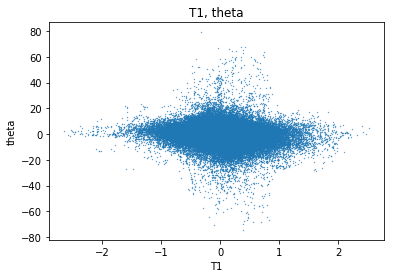

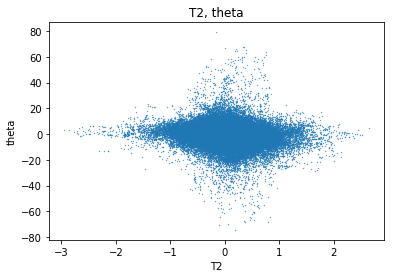

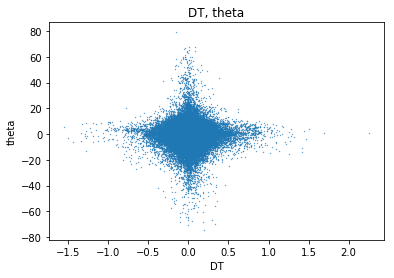

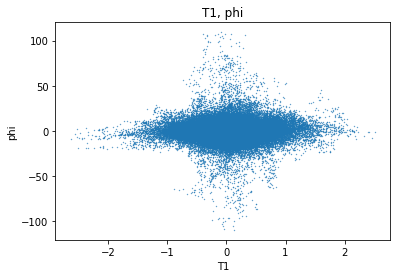

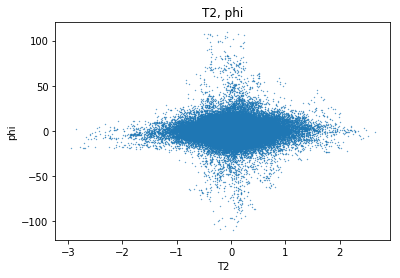

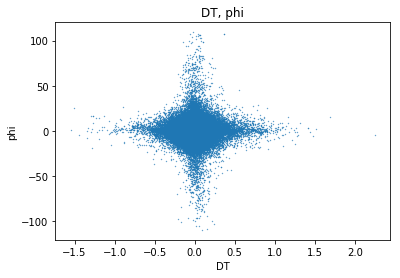

In [8]:
plt.title('T1, theta')
plt.xlabel('T1')
plt.ylabel('theta')

plt.scatter(data.T1_dev, data.theta_dev, s=.1)

plt.show()

plt.title('T2, theta')
plt.xlabel('T2')
plt.ylabel('theta')
plt.scatter(data.T2_dev, data.theta_dev, s=.1)

plt.show()

plt.title('DT, theta')
plt.xlabel('DT')
plt.ylabel('theta')
plt.scatter(data.DT_dev, data.theta_dev, s=.1)

plt.show()

plt.title('T1, phi')
plt.xlabel('T1')
plt.ylabel('phi')
plt.scatter(data.T1_dev, data.phi_dev, s=.1)

plt.show()

plt.title('T2, phi')
plt.xlabel('T2')
plt.ylabel('phi')
plt.scatter(data.T2_dev, data.phi_dev, s=.1)

plt.show()

plt.title('DT, phi')
plt.xlabel('DT')
plt.ylabel('phi')
plt.scatter(data.DT_dev, data.phi_dev, s=.1)

plt.show()

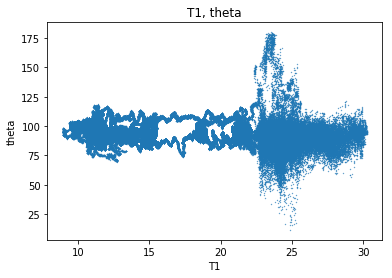

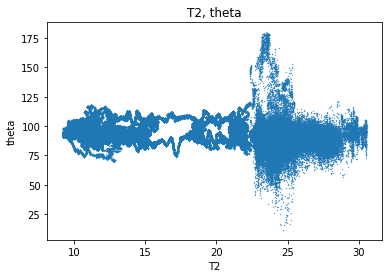

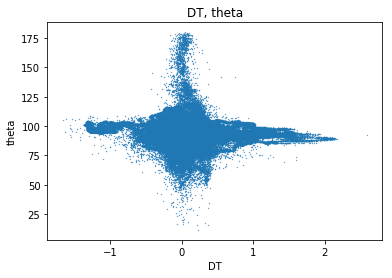

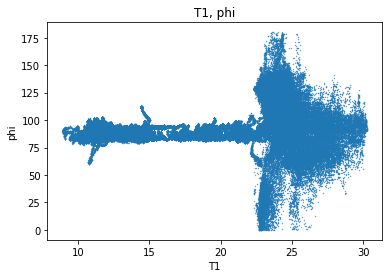

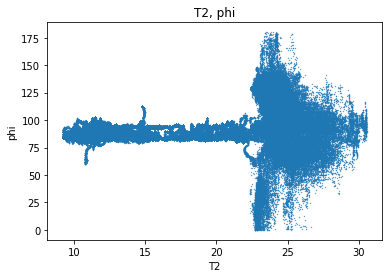

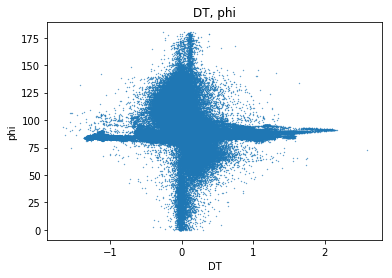

In [9]:
plt.title('T1, theta')
plt.xlabel('T1')
plt.ylabel('theta')

plt.scatter(data.T1, data.theta, s=.1)

plt.show()

plt.title('T2, theta')
plt.xlabel('T2')
plt.ylabel('theta')
plt.scatter(data.T2, data.theta, s=.1)

plt.show()

plt.title('DT, theta')
plt.xlabel('DT')
plt.ylabel('theta')
plt.scatter(data.DT, data.theta, s=.1)

plt.show()

plt.title('T1, phi')
plt.xlabel('T1')
plt.ylabel('phi')
plt.scatter(data.T1, data.phi, s=.1)

plt.show()

plt.title('T2, phi')
plt.xlabel('T2')
plt.ylabel('phi')
plt.scatter(data.T2, data.phi, s=.1)

plt.show()

plt.title('DT, phi')
plt.xlabel('DT')
plt.ylabel('phi')
plt.scatter(data.DT, data.phi, s=.1)

plt.show()